In this notebook i am handling liver problem predicting dataset and used logistic regression for predicting output.

[Link for the dataset](https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv)

## Importing Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Data Preprocessing

In [5]:
liver_data.Liver_Problem.value_counts()

1    350
2    150
Name: Liver_Problem, dtype: int64

In [6]:
liver_data['Gender']=liver_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)

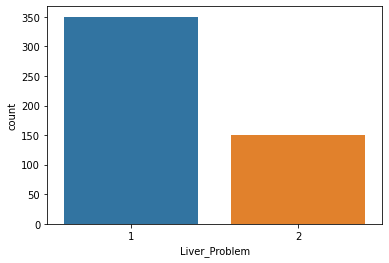

In [7]:
sns.countplot(x='Liver_Problem',data=liver_data)

In [8]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64

In [9]:
liver_data['Albumin_and_Globulin_Ratio'].fillna(liver_data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [10]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Problem                 0
dtype: int64

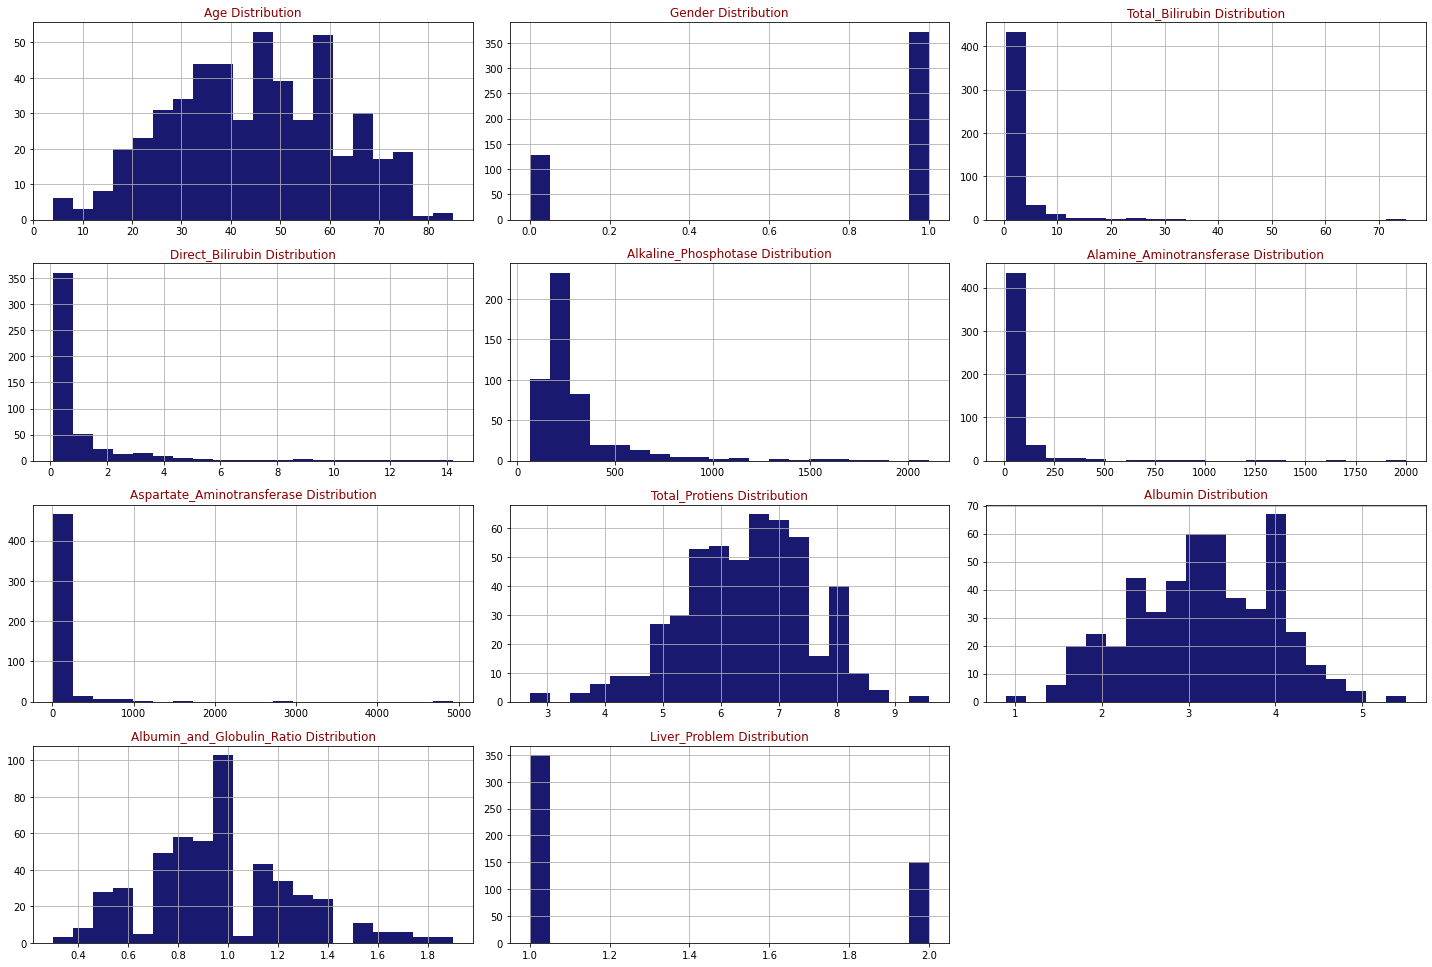

In [11]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(liver_data,liver_data.columns,6,3)

In [12]:
liver_data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,44.5860,0.744000,2.603800,1.117200,296.372000,82.736000,108.820000,6.44480,3.168800,0.960907,1.300000
std,16.5334,0.436859,5.120238,2.066709,257.461676,194.366775,307.093557,1.08902,0.799741,0.293107,0.458717
min,4.0000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.70000,0.900000,0.300000,1.000000
25%,32.7500,0.000000,0.800000,0.200000,175.000000,23.000000,24.750000,5.70000,2.600000,0.800000,1.000000
50%,45.0000,1.000000,0.900000,0.300000,205.500000,33.500000,40.000000,6.50000,3.100000,1.000000,1.000000
75%,58.0000,1.000000,2.200000,1.000000,298.000000,59.250000,79.250000,7.20000,3.800000,1.100000,2.000000
max,85.0000,1.000000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.60000,5.500000,1.900000,2.000000


In [13]:
x=liver_data.drop('Liver_Problem',axis=1)
y=liver_data['Liver_Problem']

In [14]:
from sklearn import preprocessing
x=preprocessing.scale(x)
x.mean(axis=0)

array([ 7.10542736e-17,  1.42108547e-17,  7.10542736e-17,  1.13686838e-16,
       -7.10542736e-17, -1.42108547e-17,  2.84217094e-17,  1.13686838e-16,
       -9.94759830e-17,  3.12638804e-16])

## Splitting dataset

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

## Logistic Regression model

In [16]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)

## Performnce Evalution & Hyper parameter tunning

In [17]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.85

### Confusion matrix

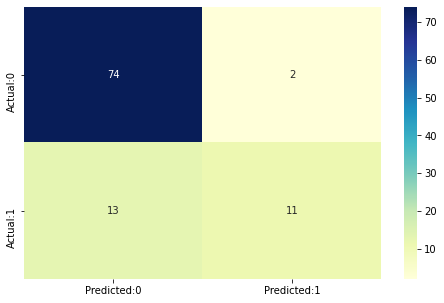

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [19]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [20]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15000000000000002 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.4583333333333333 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9736842105263158 
 Positive Predictive value = TP/(TP+FP) =  0.8461538461538461 
 Negative predictive Value = TN/(TN+FN) =  0.8505747126436781 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  17.416666666666686 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.5563063063063064


### Adjusting threshold 

In [21]:
y_pred_prob=log.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.596082,0.403918
1,0.907617,0.092383
2,0.678804,0.321196
3,0.562442,0.437558
4,0.615425,0.384575


In [22]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=log.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[ 0  0  0]
 [15 61  0]
 [ 0 24  0]] 
 with 61 correct predictions and 15 Type II errors( False Negatives) 

 Sensitivity:  0.8026315789473685 Specificity:  nan 



With 0.2 threshold the Confusion Matrix is  
 [[ 0  0  0]
 [28 48  0]
 [ 0 24  0]] 
 with 48 correct predictions and 28 Type II errors( False Negatives) 

 Sensitivity:  0.631578947368421 Specificity:  nan 



With 0.3 threshold the Confusion Matrix is  
 [[ 0  0  0]
 [41 35  0]
 [ 4 20  0]] 
 with 35 correct predictions and 41 Type II errors( False Negatives) 

 Sensitivity:  0.4605263157894737 Specificity:  nan 



With 0.4 threshold the Confusion Matrix is  
 [[ 0  0  0]
 [58 18  0]
 [ 9 15  0]] 
 with 18 correct predictions and 58 Type II errors( False Negatives) 

 Sensitivity:  0.23684210526315788 Specificity:  nan 





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


## Processing with Test data

In [24]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')

In [25]:
test_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1


In [26]:
test_new['Gender']=test_new['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [27]:
test_pred=log.predict(test_new)

In [28]:
res = pd.DataFrame(test_pred)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_HP.csv")

In [29]:
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>